## Loading the datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import PoissonRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

In [2]:
file_path_no = '/content/csv_AKI_NO v7.csv'
file_path_yes = '/content/csv_AKI_YES v7.csv'

aki_no = pd.read_csv(file_path_no)
aki_yes = pd.read_csv(file_path_yes)

aki_no

,ID,ABX,ABXD,ABXDAYS,DKI,NEPH,IDATE,AGE,GENDER,ICODE,...,MRZ,Nephrotoxic ABX 1=yes 0=no ND = no data,Number of Days on Nephrotoxic ABX (ND= no data) (NA = not applicable),Direct Kidney Injury 0=nil 1=injury,Nephrectomy 0=nil 1=yes,Pre-existing CKD in HX,RISK FACTORS AKI (co-morbidity),RISK FACTORS AKI (co-morbidity).1,Nephrotoxic DRUGS 1=yes 0=no,Charlson Co-morbidity Index
0,1,NaN,NaN,NaN,0,0,23/01/2008,19,1,7,...,0,ND,ND,0.0,0,0,0,0,0,0
1,2,NaN,NaN,NaN,0,0,23/01/2008,76,0,8,...,0,ND,ND,0.0,0,0,0,1,0,3
2,3,NaN,NaN,NaN,0,0,28/01/2008,34,1,10,...,0,ND,ND,0.0,0,0,0,0,0,0
3,4,NaN,NaN,NaN,0,0,29/01/2008,47,0,20,...,0,ND,ND,0.0,0,0,0,0,0,0
4,5,NaN,NaN,NaN,0,0,29/01/2008,41,1,1,...,0,ND,ND,0.0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1227,1391,0.0,NaN,0.0,0,0,04/10/2015,35,0,14,...,0,0,NaN,0.0,0,0,NaN,0,0,0
1228,1479,0.0,NaN,0.0,0,0,06/05/2016,26,1,7,...,0,0,NaN,0.0,0,0,NaN,0,0,0
1229,1516,0.0,NaN,0.0,0,0,07/08/2016,16,1,11,...,0,0,NaN,0.0,0,0,NaN,0,0,0
1230,1520,0.0,NaN,0.0,0,0,11/08/2016,40,1,2,...,0,0,NaN,0.0,0,0,NaN,0,0,0


In [3]:
aki_yes

,ID,ABX,ABXD,ABXDAYS,DKI,NEPH,IDATE,AGE,GENDER,ICODE,...,First day after injury that AKI criteria met,Only UOMIN,Nephrotoxic ABX 1=yes 0=no ND = no data,Number of Days on Nephrotoxic ABX (ND= no data) (NA = not applicable),Direct Kidney Injury 0=nil 1=injury,Nephrectomy 0=nil 1=yes,Known pre-existing CKDin Hx yes = 1,RISK FACTORS AKI (co-morbidity),Nephrotoxic Drugs total 1=yes 0=no,Charlsons Co-morbidity Index
0,84,NaN,NaN,NaN,0,0,21/08/2008,29,1,15,...,6,0,ND,ND,0,0,0,0,0,0
1,101,NaN,NaN,NaN,0,0,01/10/2008,71,1,4,...,5,0,ND,ND,0,0,0,1,0,3
2,120,NaN,NaN,NaN,0,0,10/12/2008,72,1,8,...,2,0,ND,ND,0,0,0,1,0,5
3,149,NaN,NaN,NaN,0,0,27/01/2009,54,1,6,...,2,0,ND,ND,0,0,0,0,0,1
4,158,NaN,NaN,NaN,0,0,15/02/2009,28,1,10,...,1,0,ND,ND,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,1563,1.0,7.0,7.0,0,0,31/10/2016,34,0,8,...,1,0,1,7,0,0,0,1,1,0
174,1566,0.0,NaN,0.0,0,0,03/11/2016,38,1,2,...,RRT,0,0,NaN,0,0,0,0,0,0
175,1567,0.0,NaN,0.0,0,0,05/11/2016,75,1,16,...,2,0,0,NaN,0,0,0,0,0,3
176,1578,0.0,NaN,0.0,0,0,03/12/2016,32,0,4,...,5,0,0,NaN,0,0,0,0,0,0


## Merging the datasets and ensuring that it has been done correctly

In [4]:
# Finding the common columns
columns_no = set(aki_no.columns)
columns_yes = set(aki_yes.columns)
common_columns = columns_no & columns_yes

# Finding the unique columns in each dataframe
unique_to_no = columns_no - columns_yes
unique_to_yes = columns_yes - columns_no

print(f"Number of columns in aki_no: {len(columns_no)}")
print(f"Number of columns in aki_yes: {len(columns_yes)}")
print(f"Number of common columns: {len(common_columns)}")
print(f"Number of columns unique to aki_no: {len(unique_to_no)}")
print(f"Number of columns unique to aki_yes: {len(unique_to_yes)}")

print(f"Columns unique to aki_no: {unique_to_no}")
print(f"Columns unique to aki_yes: {unique_to_yes}")

# Merging the datasets
df_combined = pd.concat([aki_no, aki_yes], axis=0, ignore_index=True)

print(f"Shape of merged dataframe: {df_combined.shape}")


Number of columns in aki_no: 391
Number of columns in aki_yes: 406
Number of common columns: 387
Number of columns unique to aki_no: 4
Number of columns unique to aki_yes: 19
Columns unique to aki_no: {'Nephrotoxic DRUGS  1=yes 0=no ', 'Pre-existing CKD in HX', 'Charlson Co-morbidity Index', 'RISK FACTORS AKI (co-morbidity).1'}
Columns unique to aki_yes: {'AKIRIFLEDAY', 'Known pre-existing CKDin Hx yes = 1', 'Nephrotoxic Drugs total 1=yes 0=no', 'AKIUOMINDAY', 'AKIRIFLE.1', 'AKICRE265DAY', 'Charlsons Co-morbidity Index', 'Only UOMIN', 'AKICRE265.1', 'AKI Stage', 'AKIFINAL.1', 'AKIUOMIN.1', 'Number of Criteria met', 'RRTANY.1', 'CR030', 'CR020', 'First day after injury that AKI criteria met', 'AKICRE15.1', 'AKICRE15DAY'}
Shape of merged dataframe: (1410, 410)


In [5]:
df_combined

,ID,ABX,ABXD,ABXDAYS,DKI,NEPH,IDATE,AGE,GENDER,ICODE,...,AKICRE15DAY,AKIUOMIN.1,AKIUOMINDAY,AKIFINAL.1,Number of Criteria met,First day after injury that AKI criteria met,Only UOMIN,Known pre-existing CKDin Hx yes = 1,Nephrotoxic Drugs total 1=yes 0=no,Charlsons Co-morbidity Index
0,1,NaN,NaN,NaN,0,0,23/01/2008,19,1,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,NaN,0,0,23/01/2008,76,0,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,NaN,NaN,0,0,28/01/2008,34,1,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,NaN,NaN,0,0,29/01/2008,47,0,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,0,0,29/01/2008,41,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1405,1563,1.0,7.0,7.0,0,0,31/10/2016,34,0,8,...,13.0,0.0,NaN,1.0,2.0,1,0.0,0.0,1.0,0.0
1406,1566,0.0,NaN,0.0,0,0,03/11/2016,38,1,2,...,NaN,NaN,NaN,1.0,1.0,RRT,0.0,0.0,0.0,0.0
1407,1567,0.0,NaN,0.0,0,0,05/11/2016,75,1,16,...,NaN,0.0,NaN,1.0,1.0,2,0.0,0.0,0.0,3.0
1408,1578,0.0,NaN,0.0,0,0,03/12/2016,32,0,4,...,NaN,0.0,NaN,1.0,1.0,5,0.0,0.0,0.0,0.0


# Data cleaning

In [6]:
# Selecting relevant columns from the dataframe
#additional_vars = ['PT', 'INR', 'ROTEM', 'PREPLT', 'PLT']

columns_to_keep = ['PREPRBC', 'IHR12PRBC', 'HNAIS', 'FAIS', 'TAIS', 'APAIS', 'EMAIS', 'ELAIS', 'AGE', 'GENDER', 'PREGCS', 'PREHR', 'PRESBP', 'LACT', 'BE', 'PH']
df_relevant = df_combined[columns_to_keep]

# Check for missing values
missing_values = df_relevant.isnull().sum()
missing_values = missing_values[missing_values > 0]
print("Missing values in the dataset:")
print(missing_values)

# Drop rows with any missing values
df_relevant_clean = df_relevant.dropna()

print(f"\nNumber of rows before dropping: {df_relevant.shape[0]}")
print(f"Number of rows after dropping: {df_relevant_clean.shape[0]}")


Missing values in the dataset:
PREPRBC        3
IHR12PRBC      2
HNAIS          3
FAIS           7
TAIS           5
APAIS          6
EMAIS          4
ELAIS          7
PREGCS        67
PREHR        115
PRESBP       213
LACT          82
BE            80
PH            67
dtype: int64

Number of rows before dropping: 1410
Number of rows after dropping: 1088


In [7]:
df_relevant_clean

,PREPRBC,IHR12PRBC,HNAIS,FAIS,TAIS,APAIS,EMAIS,ELAIS,AGE,GENDER,PREGCS,PREHR,PRESBP,LACT,BE,PH
0,0.0,0.0,0,0,0,0,1,0,19,1,15.0,101.0,157.0,5.0,0.0,7.300
2,0.0,1.0,0,0,0,2,3,0,34,1,15.0,123.0,105.0,4.0,-3.6,7.290
3,0.0,0.0,4,3,0,0,0,0,47,0,15.0,100.0,147.0,2.6,-2.0,7.470
4,0.0,0.0,1,0,2,0,0,0,41,1,15.0,88.0,145.0,1.2,2.3,7.410
6,0.0,0.0,2,1,0,0,0,0,24,1,15.0,83.0,122.0,2.3,-1.4,7.390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1402,0.0,0.0,4,0.0,3,0.0,2,1.0,73,0,11.0,102.0,175.0,6.1,-1.6,7.449
1404,0.0,6.0,5,2.0,0,0.0,0,0.0,25,1,5.0,92.0,159.0,0.7,-4.2,7.357
1407,5.0,6.0,5,2.0,3,4.0,5,6.0,75,1,3.0,98.0,88.0,2.1,-2.5,7.370
1408,0.0,0.0,3,2.0,0,0.0,0,2.0,32,0,12.0,101.0,195.0,3.8,-4.8,7.325


# Data Exploration

In [8]:
df_relevant_clean.describe()

,PREPRBC,IHR12PRBC,AGE,GENDER,PREGCS,PREHR,PRESBP,LACT,BE,PH
count,1088.000000,1088.000000,1088.00000,1088.000000,1088.000000,1088.000000,1088.000000,1088.000000,1088.000000,1088.000000
mean,0.267463,1.855699,39.98989,0.811581,12.214154,93.429228,127.082721,3.152298,-2.743107,7.323324
std,0.952008,4.928453,17.86371,0.391226,4.081180,26.203586,31.547989,3.174785,6.102899,0.127585
min,0.000000,0.000000,16.00000,0.000000,3.000000,0.000000,0.000000,0.300000,-73.400000,6.500000
25%,0.000000,0.000000,25.00000,1.000000,10.000000,76.000000,111.750000,1.400000,-4.100000,7.290000
50%,0.000000,0.000000,36.00000,1.000000,15.000000,91.000000,129.000000,2.150000,-1.200000,7.350000
75%,0.000000,2.000000,52.00000,1.000000,15.000000,110.000000,144.000000,3.400000,0.700000,7.390000
max,10.000000,56.000000,95.00000,1.000000,15.000000,212.000000,243.000000,23.000000,15.300000,7.692000


Text(0, 0.5, 'Frequency')

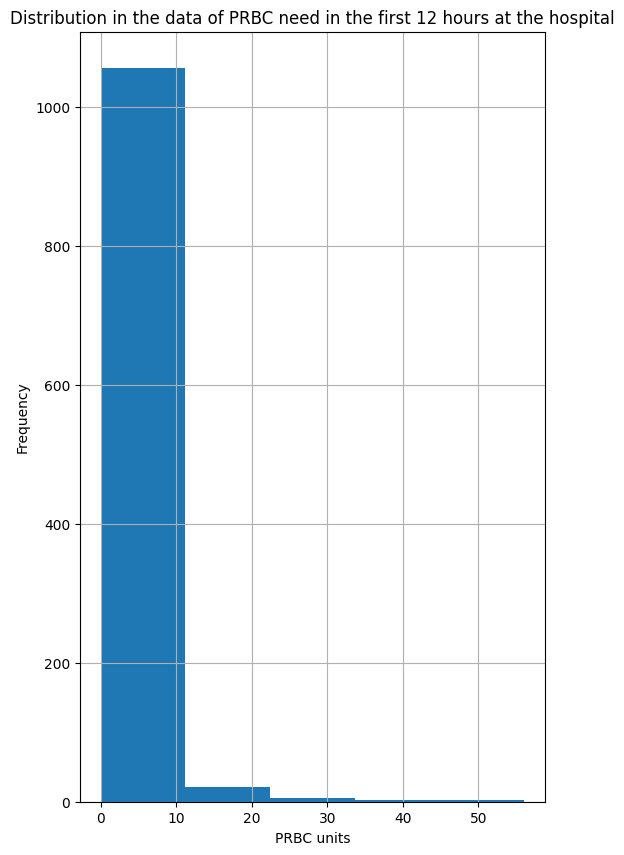

In [9]:
ax = df_relevant_clean.hist(column='IHR12PRBC', bins=5, figsize=(6,10))

plt.title('Distribution in the data of PRBC need in the first 12 hours at the hospital')
plt.xlabel('PRBC units')
plt.ylabel('Frequency')

In [10]:
ais_columns = ['HNAIS', 'FAIS', 'TAIS', 'APAIS', 'EMAIS', 'ELAIS']

print(df_relevant_clean[ais_columns + ['IHR12PRBC']].dtypes)

HNAIS         object
FAIS          object
TAIS          object
APAIS         object
EMAIS         object
ELAIS         object
IHR12PRBC    float64
dtype: object


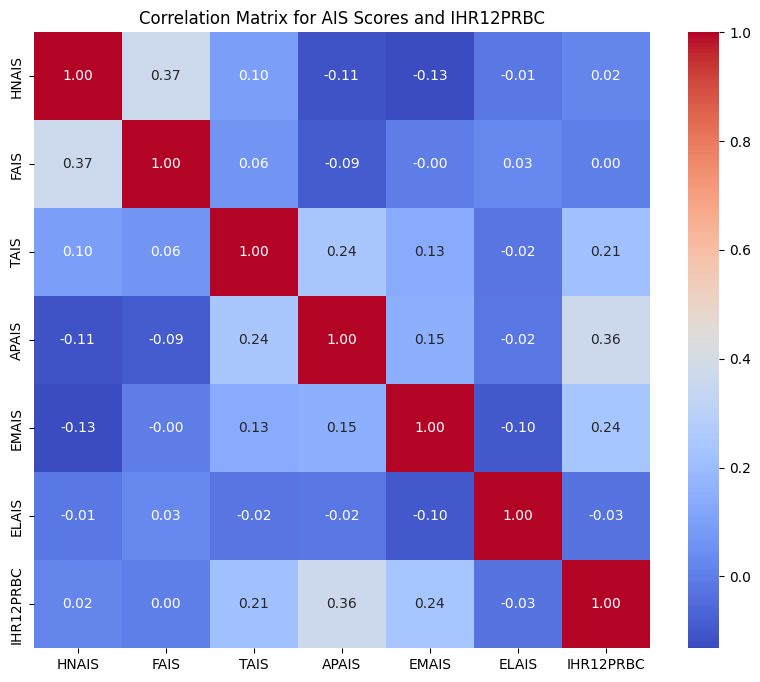

In [11]:
# did not use .loc and this caused some issues
#df_relevant_clean[ais_columns] = df_relevant_clean[ais_columns].apply(pd.to_numeric, errors='coerce')

# Convert AIS columns to numeric values
df_relevant_clean.loc[:, ais_columns] = df_relevant_clean[ais_columns].apply(pd.to_numeric, errors='coerce') #

# Compute correlations
correlations = df_relevant_clean[ais_columns + ['IHR12PRBC']].corr()
#print("Correlation between AIS scores and IHR12PRBC:")
#print(correlations['IHR12PRBC'])
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Matrix for AIS Scores and IHR12PRBC')
plt.show()

In [12]:
print(df_relevant_clean[ais_columns + ['IHR12PRBC']].dtypes)

HNAIS         object
FAIS          object
TAIS          object
APAIS         object
EMAIS         object
ELAIS         object
IHR12PRBC    float64
dtype: object


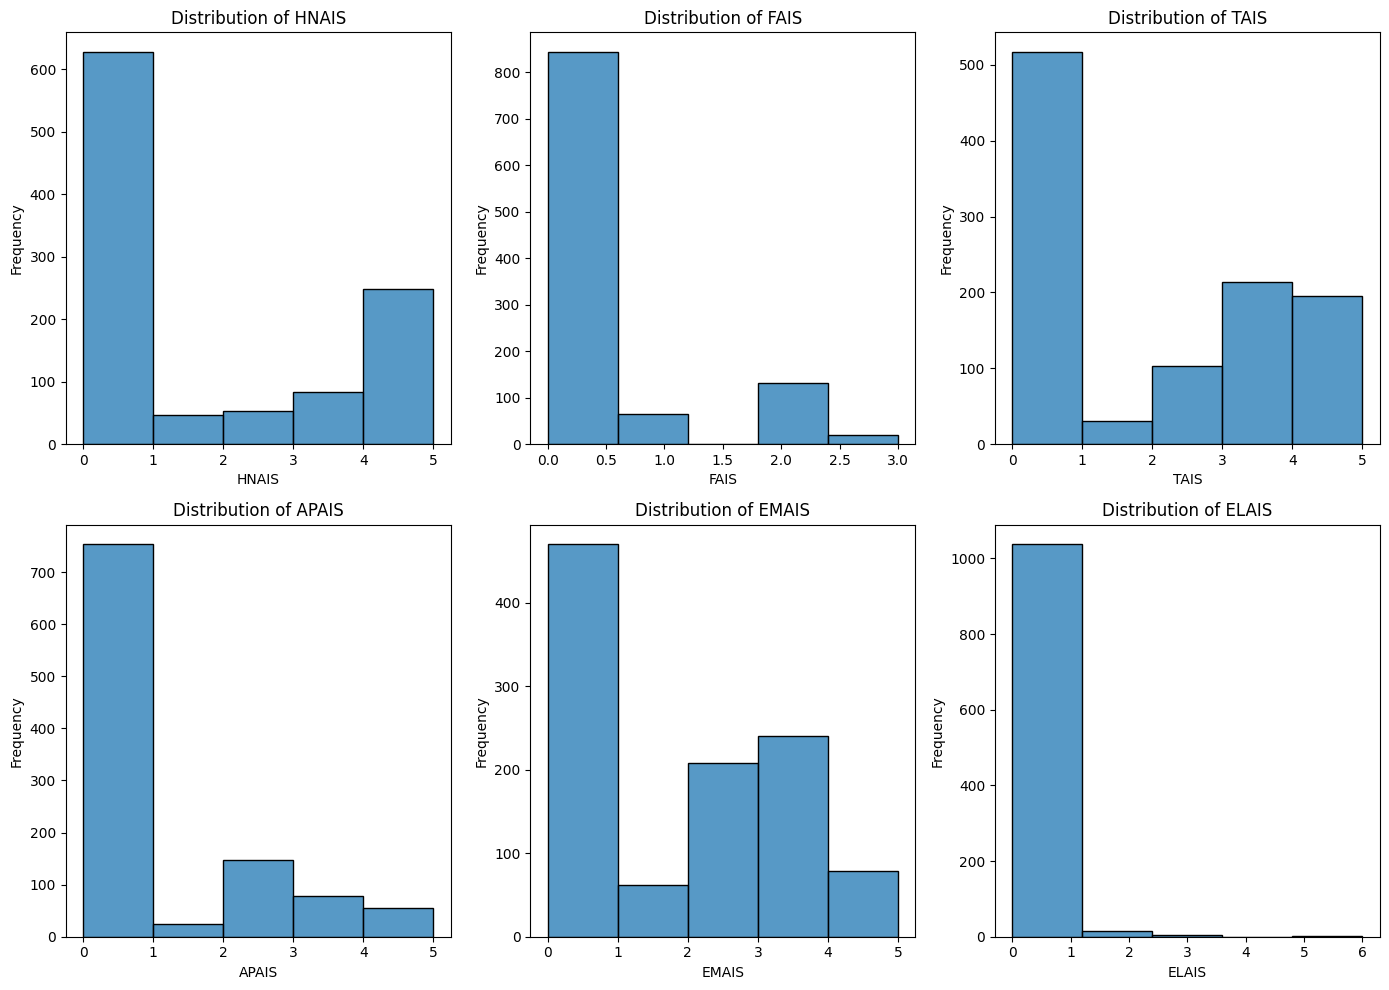

In [13]:
plt.figure(figsize=(14, 10))

for i, col in enumerate(ais_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df_relevant_clean[col], kde=False, bins=5)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

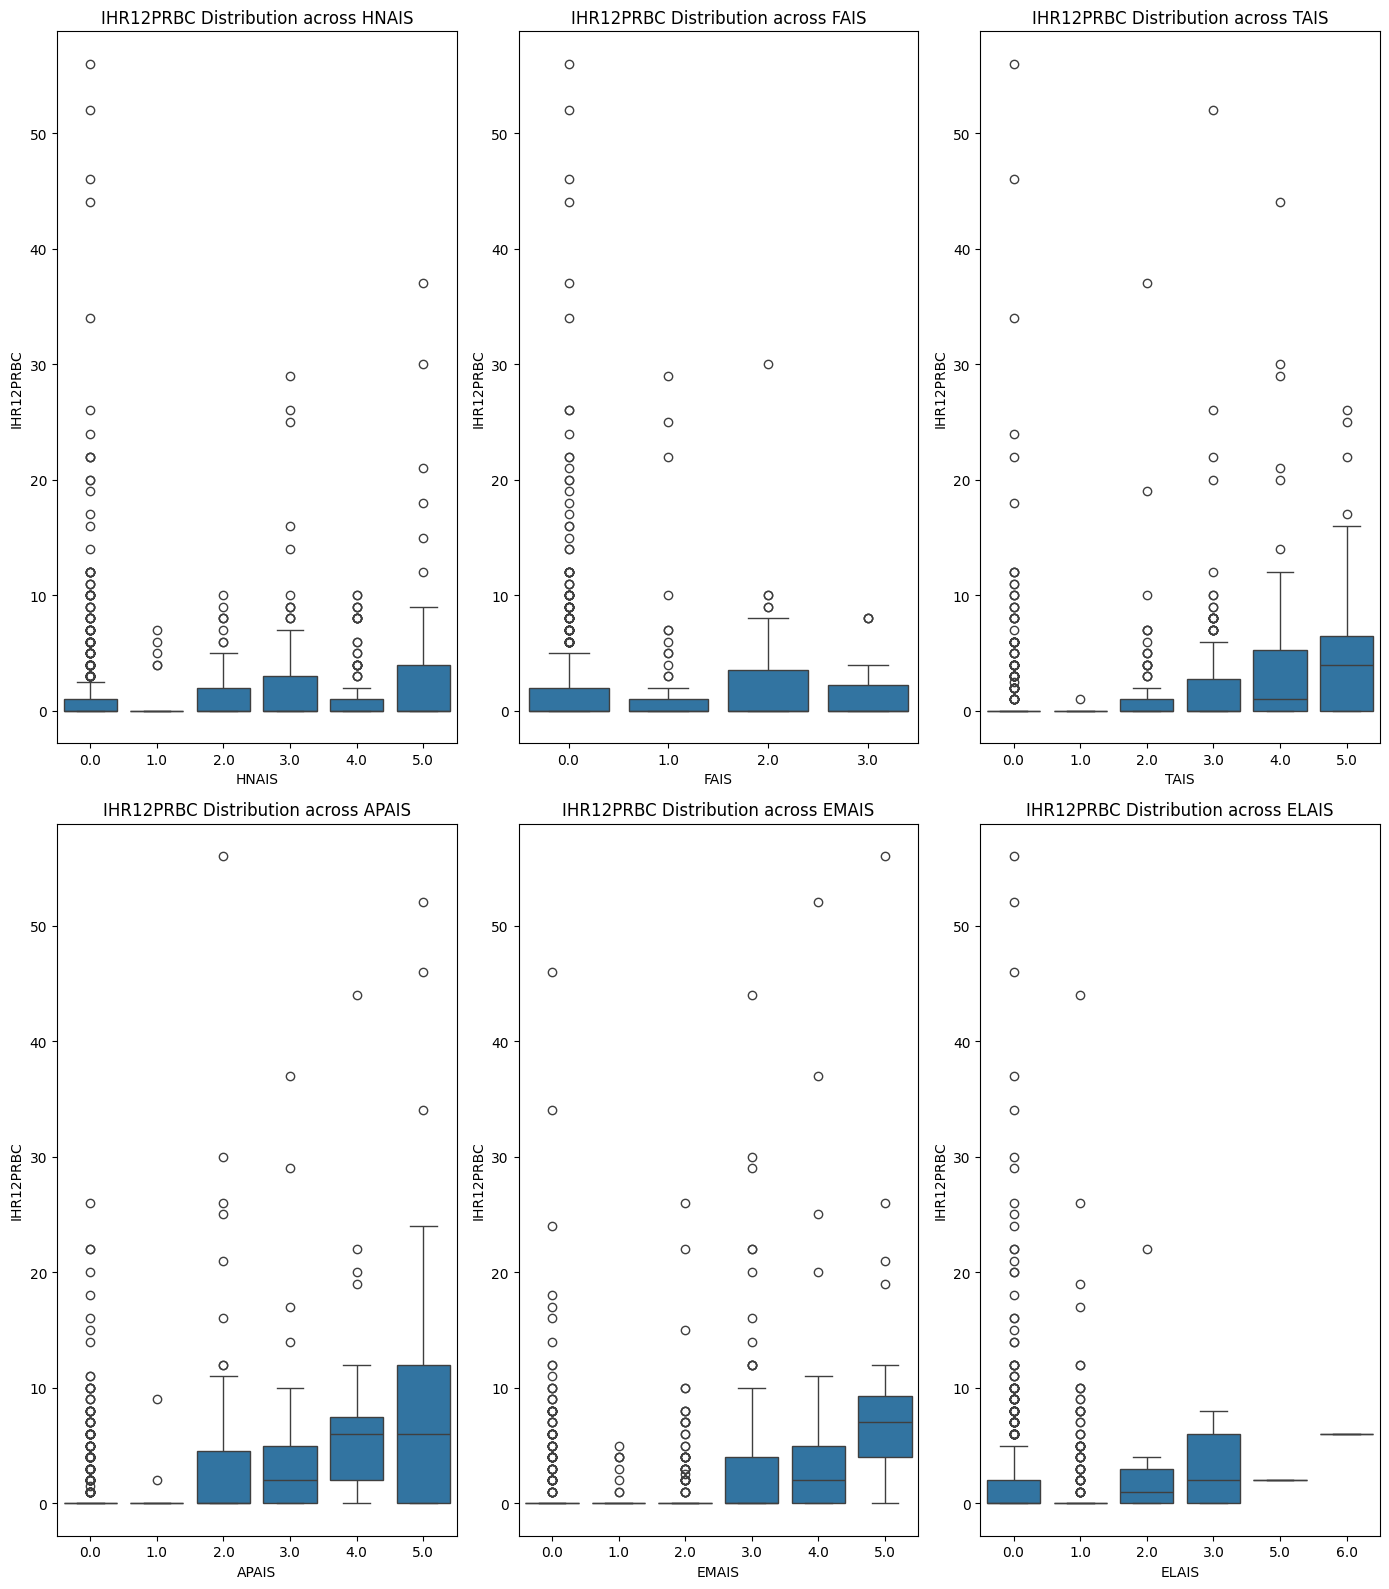

In [14]:
plt.figure(figsize=(14, 16))

for i, col in enumerate(ais_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df_relevant_clean[col], y=df_relevant_clean['IHR12PRBC'])
    plt.title(f'IHR12PRBC Distribution across {col}')
    plt.xlabel(col)
    plt.ylabel('IHR12PRBC')

plt.tight_layout()
plt.show()

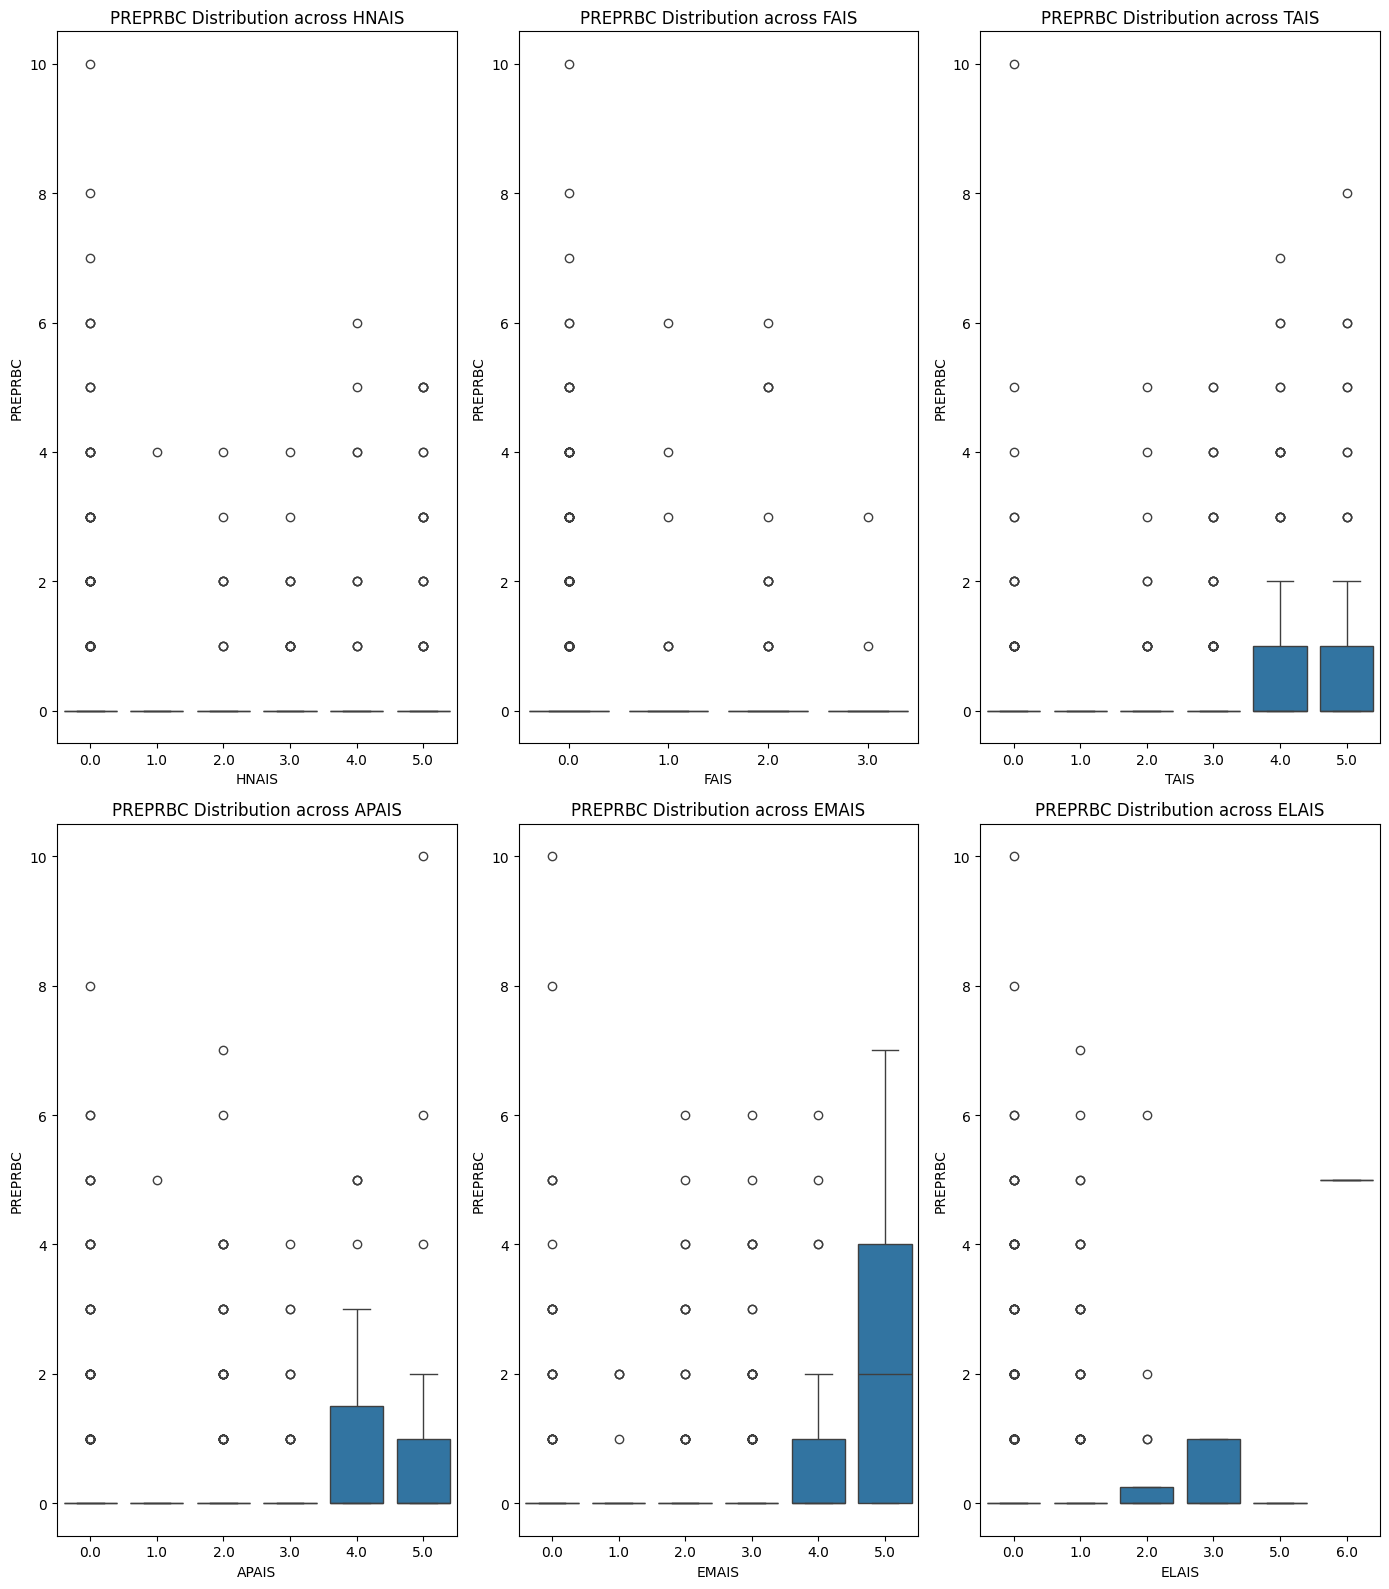

In [15]:
plt.figure(figsize=(14, 16))

for i, col in enumerate(ais_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df_relevant_clean[col], y=df_relevant_clean['PREPRBC'])
    plt.title(f'PREPRBC Distribution across {col}')
    plt.xlabel(col)
    plt.ylabel('PREPRBC')

plt.tight_layout()
plt.show()

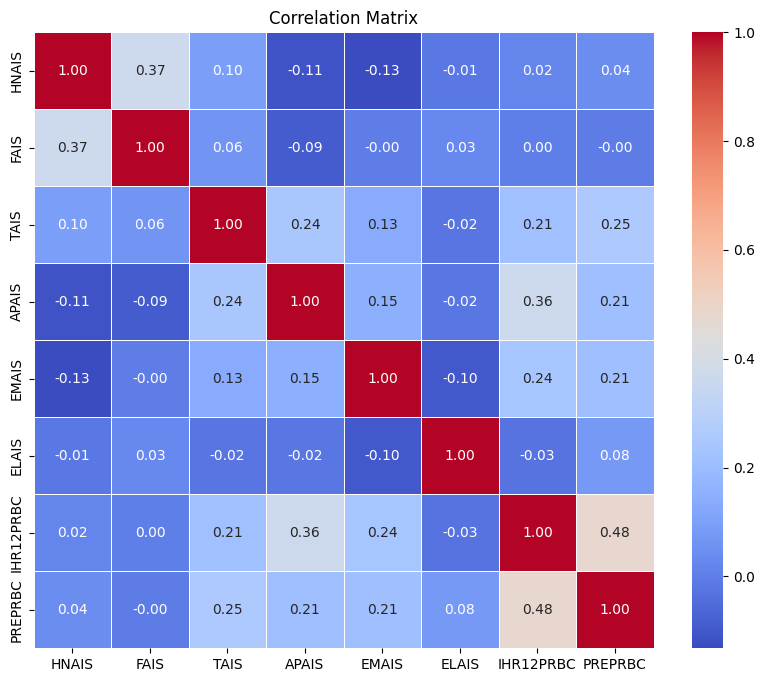

In [16]:
relevant_columns = ais_columns + ['IHR12PRBC', 'PREPRBC']
correlation_matrix = df_relevant_clean[relevant_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [17]:
# Function to convert AIS scores to categorical
def convert_ais_to_categorical(ais): #for initial data exploration - use original categories for AIS distribution e.g. no injury, mild, severe
    if 0 == ais:
        return 0 # no injury
    elif 1 <= ais <= 3:
        return 1 # Mild to moderate injury
    else:
      return 2 # Severe injury

# for col in ais_columns:
#     df_relevant_clean[col] = pd.to_numeric(df_relevant_clean[col], errors='coerce')
#     df_relevant_clean[col] = df_relevant_clean[col].apply(convert_ais_to_categorical)

# Apply conversion to each AIS column using .loc to avoid the warning
for col in ais_columns:
    df_relevant_clean.loc[:, col] = pd.to_numeric(df_relevant_clean[col], errors='coerce')
    df_relevant_clean.loc[:, col] = df_relevant_clean[col].apply(convert_ais_to_categorical)

## Splitting the dataset

In [18]:
input_vars = ['PREPRBC', 'HNAIS', 'FAIS', 'TAIS', 'APAIS', 'EMAIS', 'ELAIS', 'AGE', 'GENDER', 'PREGCS', 'PREHR', 'PRESBP', 'LACT', 'BE', 'PH']
output_var = 'IHR12PRBC'

# Definition of input features and target variable
X = df_relevant_clean[input_vars]
y = df_relevant_clean[output_var]

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardisation
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
# Check the data types of the AIS columns
print(df_relevant_clean[ais_columns].dtypes)

# Check if there are any non-numeric values in the AIS columns
for col in ais_columns:
    print(f"Column: {col}")
    print(df_relevant_clean[col].unique())

HNAIS    object
FAIS     object
TAIS     object
APAIS    object
EMAIS    object
ELAIS    object
dtype: object
Column: HNAIS
[0 2 1]
Column: FAIS
[0 1 2]
Column: TAIS
[0 1 2]
Column: APAIS
[0 1 2]
Column: EMAIS
[1 0 2]
Column: ELAIS
[0 1 2]


In [20]:
# Check for NaN values in the AIS columns after conversion
print(df_relevant_clean[ais_columns].isna().sum())

# Check for NaN values in the entire dataset
print(X.isna().sum())


HNAIS    0
FAIS     0
TAIS     0
APAIS    0
EMAIS    0
ELAIS    0
dtype: int64
PREPRBC    0
HNAIS      0
FAIS       0
TAIS       0
APAIS      0
EMAIS      0
ELAIS      0
AGE        0
GENDER     0
PREGCS     0
PREHR      0
PRESBP     0
LACT       0
BE         0
PH         0
dtype: int64


# Linear Regression

Linear Regression - MSE: 11.5399555513101, R2: 0.4477137046741947


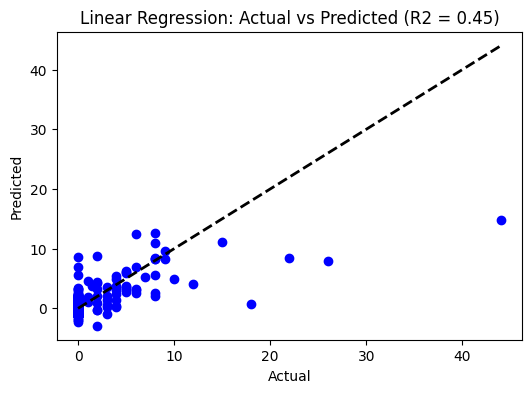

In [21]:
# Training the model
lir = LinearRegression()
lir.fit(X_train_scaled, y_train)

y_pred_lir = lir.predict(X_test_scaled)

# Evaluation
mse_lir = mean_squared_error(y_test, y_pred_lir)
r2_lir = r2_score(y_test, y_pred_lir)

print(f"Linear Regression - MSE: {mse_lir}, R2: {r2_lir}")

# Actual vs. Predicted Plot
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred_lir, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title(f'Linear Regression: Actual vs Predicted (R2 = {r2_lir:.2f})')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

# Random Forest Regressor

Random Forest Regressor - MSE: 13.51827878440367, R2: 0.35303389377681416


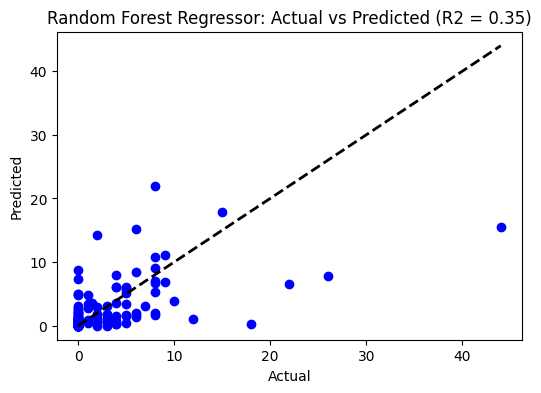

In [22]:
# Training the model
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_scaled, y_train)

y_pred_rf = rf.predict(X_test_scaled)

#Evaluation
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Regressor - MSE: {mse_rf}, R2: {r2_rf}")

# Actual vs. Predicted Plot
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred_rf, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title(f'Random Forest Regressor: Actual vs Predicted (R2 = {r2_rf:.2f})')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

# Gradient Boost Regressor

Gradient Boosting Regressor - MSE: 15.656019025084635, R2: 0.2507246056131738


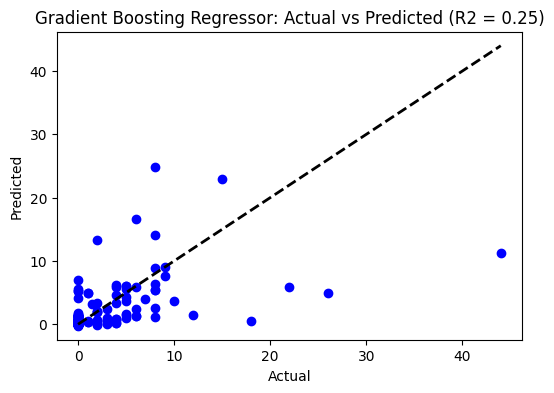

In [23]:
gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train_scaled, y_train)

y_pred_gb = gb.predict(X_test_scaled)

mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f"Gradient Boosting Regressor - MSE: {mse_gb}, R2: {r2_gb}")

plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred_gb, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title(f'Gradient Boosting Regressor: Actual vs Predicted (R2 = {r2_gb:.2f})')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

Poisson Regression - MSE: 11.856865109677926, R2: 0.4325468519799974


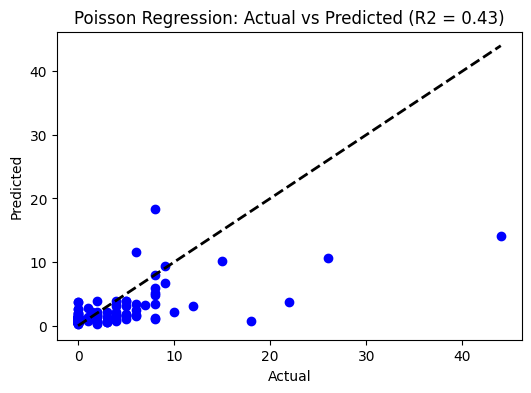

In [24]:
pr = PoissonRegressor()
pr.fit(X_train_scaled, y_train)

y_pred_pr = pr.predict(X_test_scaled)

mse_pr = mean_squared_error(y_test, y_pred_pr)
r2_pr = r2_score(y_test, y_pred_pr)

print(f"Poisson Regression - MSE: {mse_pr}, R2: {r2_pr}")

plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred_pr, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title(f'Poisson Regression: Actual vs Predicted (R2 = {r2_pr:.2f})')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

# Classification tasks

In [25]:
range_summary = df_relevant_clean['IHR12PRBC'].describe()
print(range_summary)

count    1088.000000
mean        1.855699
std         4.928453
min         0.000000
25%         0.000000
50%         0.000000
75%         2.000000
max        56.000000
Name: IHR12PRBC, dtype: float64


In [26]:
# Convert IHR12PRBC into categories
def categorise_ihr12prbc(value):
    if value == 0:
        return 0
    elif value <= 2:
        return 1
    elif value <= 5:
        return 2
    elif value <= 10:
        return 3
    else:
        return 4

# applying categorise function
df_relevant_clean = df_relevant_clean.copy()  # had to make a copy here to avoid SettingWithCopyWarning
df_relevant_clean.loc[:, 'IHR12PRBC_category'] = df_relevant_clean['IHR12PRBC'].apply(categorise_ihr12prbc)

In [27]:
X = df_relevant_clean[input_vars]
y = df_relevant_clean['IHR12PRBC_category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# standardising the data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Logistic regression

Logistic Regression Accuracy: 0.7568807339449541
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.97      0.89       157
           1       0.50      0.13      0.21        15
           2       0.25      0.09      0.13        23
           3       0.33      0.29      0.31        17
           4       0.50      0.50      0.50         6

    accuracy                           0.76       218
   macro avg       0.48      0.40      0.41       218
weighted avg       0.70      0.76      0.71       218



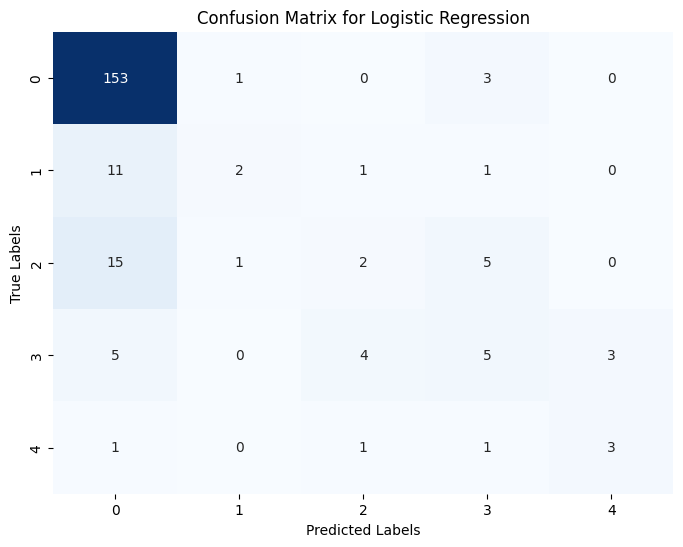

In [28]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
class_report_lr = classification_report(y_test, y_pred_lr)

print(f"Logistic Regression Accuracy: {accuracy_lr}")
print("Classification Report:\n", class_report_lr)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Random Forest Classifier



Random Forest Classifier Accuracy: 0.7660550458715596
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.98      0.90       157
           1       0.00      0.00      0.00        15
           2       0.41      0.30      0.35        23
           3       0.50      0.24      0.32        17
           4       0.33      0.33      0.33         6

    accuracy                           0.77       218
   macro avg       0.42      0.37      0.38       218
weighted avg       0.69      0.77      0.72       218



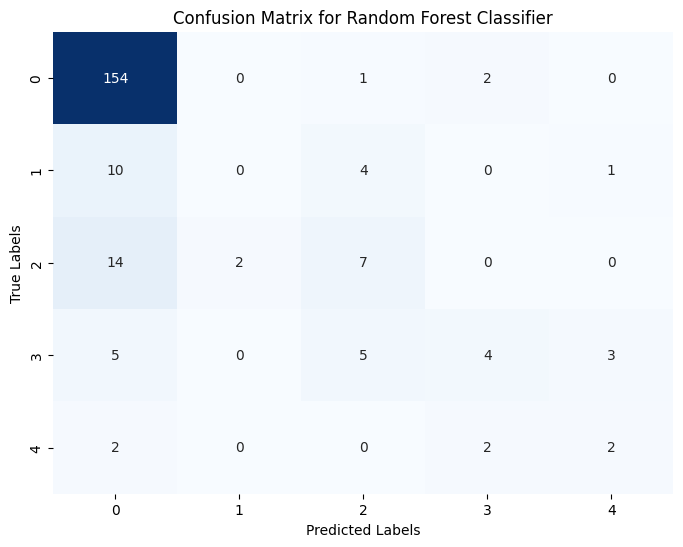

In [29]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)

y_pred_rf = rf.predict(X_test_scaled)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

print(f"Random Forest Classifier Accuracy: {accuracy_rf}")
print("Classification Report:\n", class_report_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Random Forest Classifier')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Gradient Boosting Classifier

Gradient Boosting Classifier Accuracy: 0.7431192660550459
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.97      0.90       157
           1       0.29      0.13      0.18        15
           2       0.29      0.17      0.22        23
           3       0.22      0.12      0.15        17
           4       0.33      0.33      0.33         6

    accuracy                           0.74       218
   macro avg       0.39      0.35      0.36       218
weighted avg       0.68      0.74      0.70       218



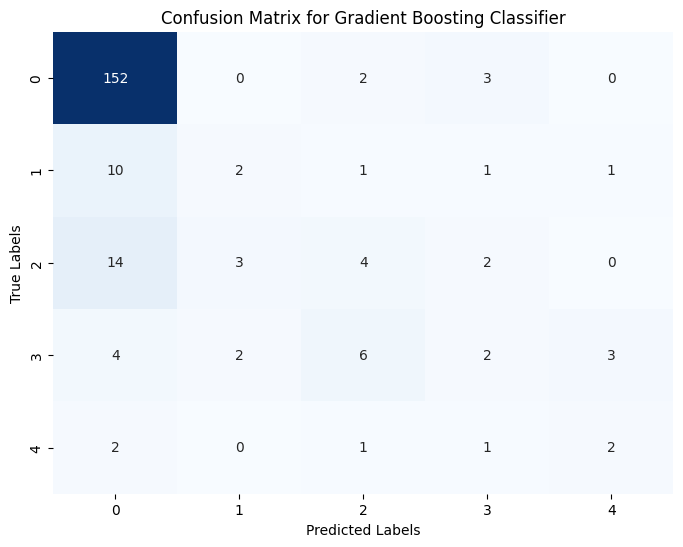

In [30]:
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train_scaled, y_train)

y_pred_gb = gb.predict(X_test_scaled)

accuracy_gb = accuracy_score(y_test, y_pred_gb)
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
class_report_gb = classification_report(y_test, y_pred_gb)

print(f"Gradient Boosting Classifier Accuracy: {accuracy_gb}")
print("Classification Report:\n", class_report_gb)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Gradient Boosting Classifier')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## Alternative category boundaries for IHRPRBC

In [31]:
# Convert IHR12PRBC into categories
def categorise_ihr12prbc_alt(value):
    if value <= 2:
        return 0
    elif value <= 10:
        return 1
    else:
        return 2

# applying categorise function
df_relevant_clean = df_relevant_clean.copy()  # had to make a copy here to avoid SettingWithCopyWarning
df_relevant_clean.loc[:, 'IHR12PRBC_category'] = df_relevant_clean['IHR12PRBC'].apply(categorise_ihr12prbc_alt)

In [32]:
X = df_relevant_clean[input_vars]
y = df_relevant_clean['IHR12PRBC_category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# standardising the data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Logistic Regression Accuracy: 0.8348623853211009
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92       172
           1       0.59      0.40      0.48        40
           2       0.33      0.17      0.22         6

    accuracy                           0.83       218
   macro avg       0.60      0.51      0.54       218
weighted avg       0.81      0.83      0.82       218



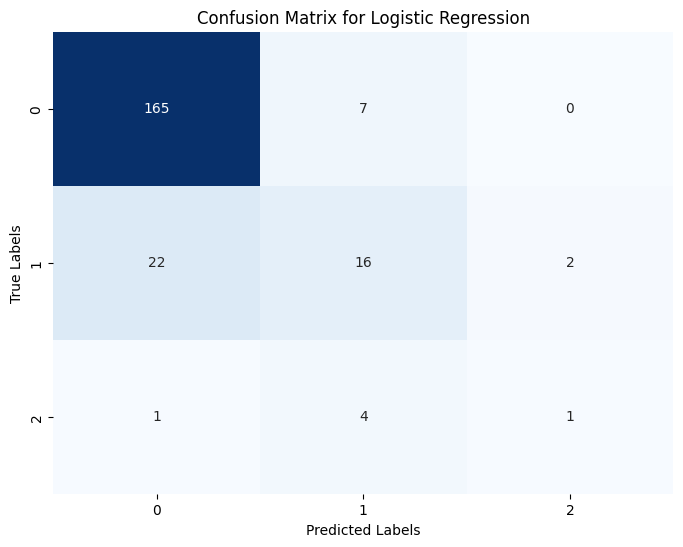

In [33]:
#Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
class_report_lr = classification_report(y_test, y_pred_lr)

print(f"Logistic Regression Accuracy: {accuracy_lr}")
print("Classification Report:\n", class_report_lr)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Gradient Boosting Classifier Accuracy: 0.8348623853211009
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.95      0.91       172
           1       0.64      0.40      0.49        40
           2       0.33      0.33      0.33         6

    accuracy                           0.83       218
   macro avg       0.62      0.56      0.58       218
weighted avg       0.82      0.83      0.82       218



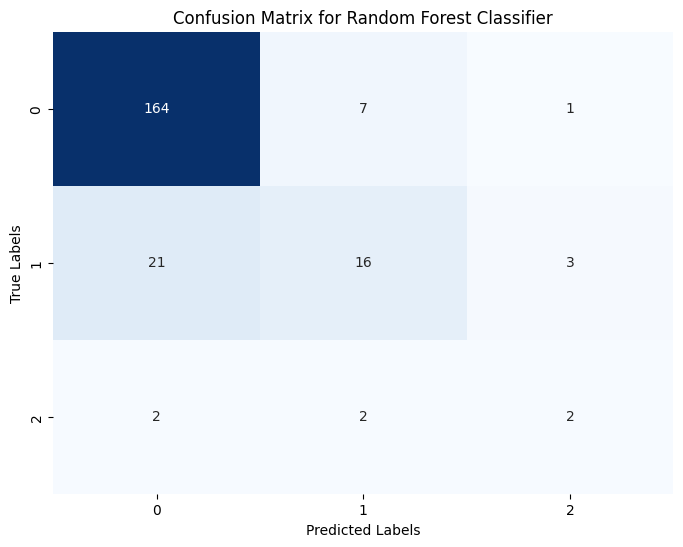

In [35]:
# Gradient Boosting Classifier
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train_scaled, y_train)

y_pred_gb = gb.predict(X_test_scaled)

accuracy_gb = accuracy_score(y_test, y_pred_gb)
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
class_report_gb = classification_report(y_test, y_pred_gb)

print(f"Gradient Boosting Classifier Accuracy: {accuracy_gb}")
print("Classification Report:\n", class_report_gb)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Gradient Boosting Classifier')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Random Forest Classifier Accuracy: 0.8532110091743119
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92       172
           1       0.69      0.45      0.55        40
           2       0.67      0.33      0.44         6

    accuracy                           0.85       218
   macro avg       0.75      0.58      0.64       218
weighted avg       0.84      0.85      0.84       218



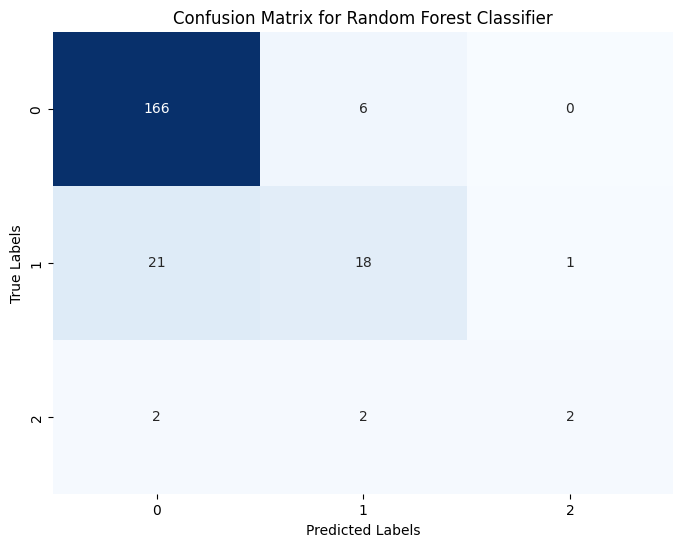

In [34]:
#Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)

y_pred_rf = rf.predict(X_test_scaled)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

print(f"Random Forest Classifier Accuracy: {accuracy_rf}")
print("Classification Report:\n", class_report_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Random Forest Classifier')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## Random Forest Classifier with hyperparameter tuning

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None, 'criterion': 'gini', 'bootstrap': False}
Tuned Random Forest Classifier Accuracy: 0.8486238532110092
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92       172
           1       0.71      0.42      0.53        40
           2       0.40      0.33      0.36         6

    accuracy                           0.85       218
   macro avg       0.66      0.57      0.60       218
weighted avg       0.83      0.85      0.83       218



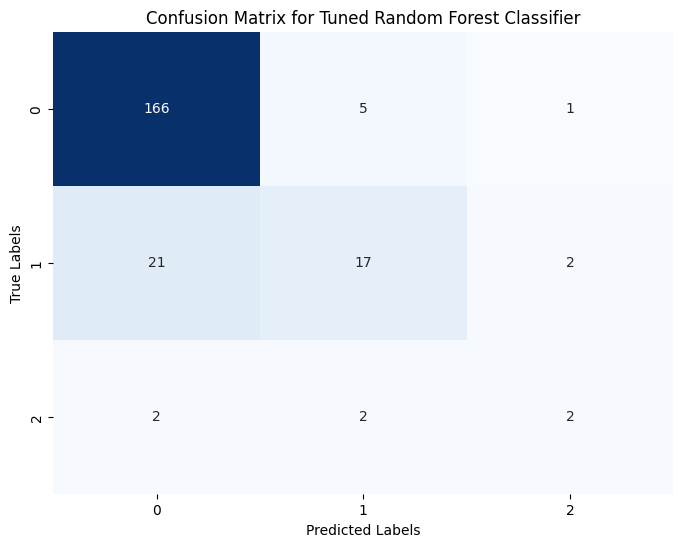

In [36]:
# Defining the parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30, 40, 50],    # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],            # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],              # Minimum number of samples required to be at a leaf node
    'max_features': [None, 'sqrt', 'log2'],     # Number of features to consider for the best split
    'bootstrap': [True, False],                 # Whether bootstrap samples are used when building trees
    'criterion': ['gini', 'entropy']            # Function to measure the quality of a split
}

rf_tuned = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(estimator=rf_tuned, param_distributions=param_grid, n_iter=100, cv=5, n_jobs=-1, verbose=2, random_state=42, scoring='accuracy')
random_search.fit(X_train_scaled, y_train)

best_rf = random_search.best_estimator_

print("Best Parameters:", random_search.best_params_)

y_pred_best_rf = best_rf.predict(X_test_scaled)

# Evaluation metrics
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
conf_matrix_best_rf = confusion_matrix(y_test, y_pred_best_rf)
class_report_best_rf = classification_report(y_test, y_pred_best_rf)

print(f"Tuned Random Forest Classifier Accuracy: {accuracy_best_rf}")
print("Classification Report:\n", class_report_best_rf)

# Plotting the confusion matrix for the tuned model
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_best_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Tuned Random Forest Classifier')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [38]:
n_classes = 3
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_pred_prob_rf_basic = rf.predict_proba(X_test_scaled)
y_pred_prob_best_rf = best_rf.predict_proba(X_test_scaled)

# AUROC for the basic model
auroc_basic = roc_auc_score(y_test_bin, y_pred_prob_rf_basic, multi_class='ovr')
print(f"Basic Random Forest Classifier AUROC: {auroc_basic}")

# AUROC for the tuned model
auroc_best_rf = roc_auc_score(y_test_bin, y_pred_prob_best_rf, multi_class='ovr')
print(f"Tuned Random Forest Classifier AUROC: {auroc_best_rf}")

Basic Random Forest Classifier AUROC: 0.8276858782830008
Tuned Random Forest Classifier AUROC: 0.8586170191494945
